In [43]:
# Importing necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 

In [44]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns' , None)

In [45]:
# Reading the CSV file into a DataFrame
df = pd.read_csv(filepath_or_buffer='score_data.csv')
df.head()  


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [46]:

df.tail() 

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [47]:
# Displaying information about the DataFrame including the data types and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [48]:
# Generating descriptive statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [49]:
# Calculating the total score and average score for each student

df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [50]:
df.test_preparation_course.value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

In [51]:
# Dropping the 'test_preparation_course' column because most of its values are None
df.drop('test_preparation_course', axis=1, inplace=True)

In [52]:
for column in df.columns:
    values = df[column].value_counts()
    print(f"Column: {column}, Values: {values}")

Column: gender, Values: gender
female    518
male      482
Name: count, dtype: int64
Column: race_ethnicity, Values: race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
Column: parental_level_of_education, Values: parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
Column: lunch, Values: lunch
standard        645
free/reduced    355
Name: count, dtype: int64
Column: math_score, Values: math_score
65    36
62    35
69    32
59    32
61    27
      ..
24     1
28     1
33     1
18     1
8      1
Name: count, Length: 81, dtype: int64
Column: reading_score, Values: reading_score
72    34
74    33
64    32
67    30
73    30
      ..
28     1
26     1
17     1
32     1
40     1
Name: count, Length: 72, dtype: int64
Column: writing_score, Values: writing_score
74    35
70   

In [53]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
math_score                     0
reading_score                  0
writing_score                  0
total_score                    0
average                        0
dtype: int64

In [54]:
# Selecting numeric columns
numeric_columns = df.select_dtypes(include=["number", "float"])
numeric_columns

,math_score,reading_score,writing_score,total_score,average
0,72,72,74,218,72.666667
1,69,90,88,247,82.333333
2,90,95,93,278,92.666667
3,47,57,44,148,49.333333
4,76,78,75,229,76.333333
...,...,...,...,...,...
995,88,99,95,282,94.000000
996,62,55,55,172,57.333333
997,59,71,65,195,65.000000
998,68,78,77,223,74.333333


In [55]:
# Selecting categoric columns
categoric_columns = df.select_dtypes(include="object")
categoric_columns

,gender,race_ethnicity,parental_level_of_education,lunch
0,female,group B,bachelor's degree,standard
1,female,group C,some college,standard
2,female,group B,master's degree,standard
3,male,group A,associate's degree,free/reduced
4,male,group C,some college,standard
...,...,...,...,...
995,female,group E,master's degree,standard
996,male,group C,high school,free/reduced
997,female,group C,high school,free/reduced
998,female,group D,some college,standard


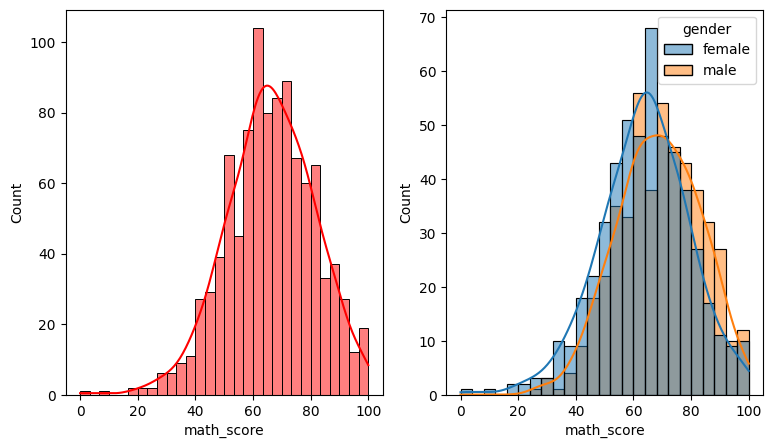

In [56]:
# Creating subplots to visualize the distribution of math scores
fig, axs = plt.subplots(1, 2, figsize=(9, 5))
plt.subplot(121)
sns.histplot(data=df, x="math_score", bins=30, kde=True, color="red")
plt.subplot(122)
sns.histplot(data=df, x="math_score", kde=True, hue="gender")
plt.show()


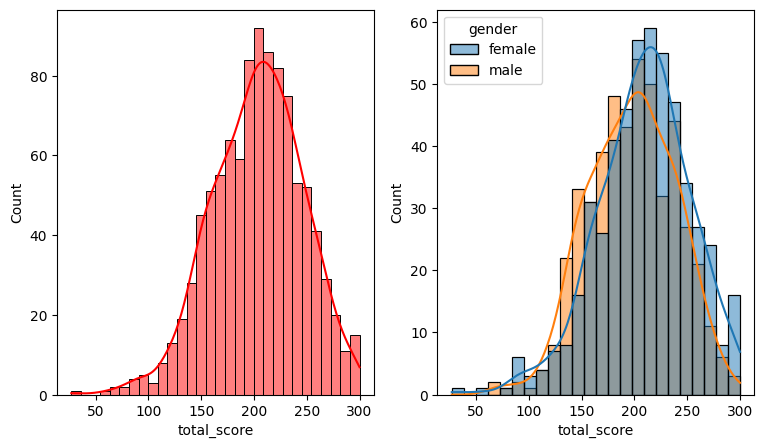

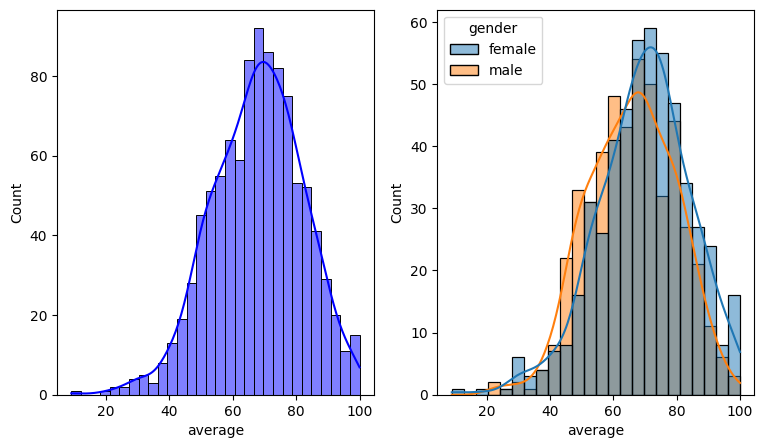

In [57]:
# Plotting histograms for 'total_score' and 'average'
fig, axs = plt.subplots(1, 2, figsize=(9, 5))
plt.subplot(121)
sns.histplot(data=df, x="total_score", bins=30, kde=True, color="red")
plt.subplot(122)
sns.histplot(data=df, x="total_score", kde=True, hue="gender")

fig, axs = plt.subplots(1, 2, figsize=(9,5))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='blue')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()


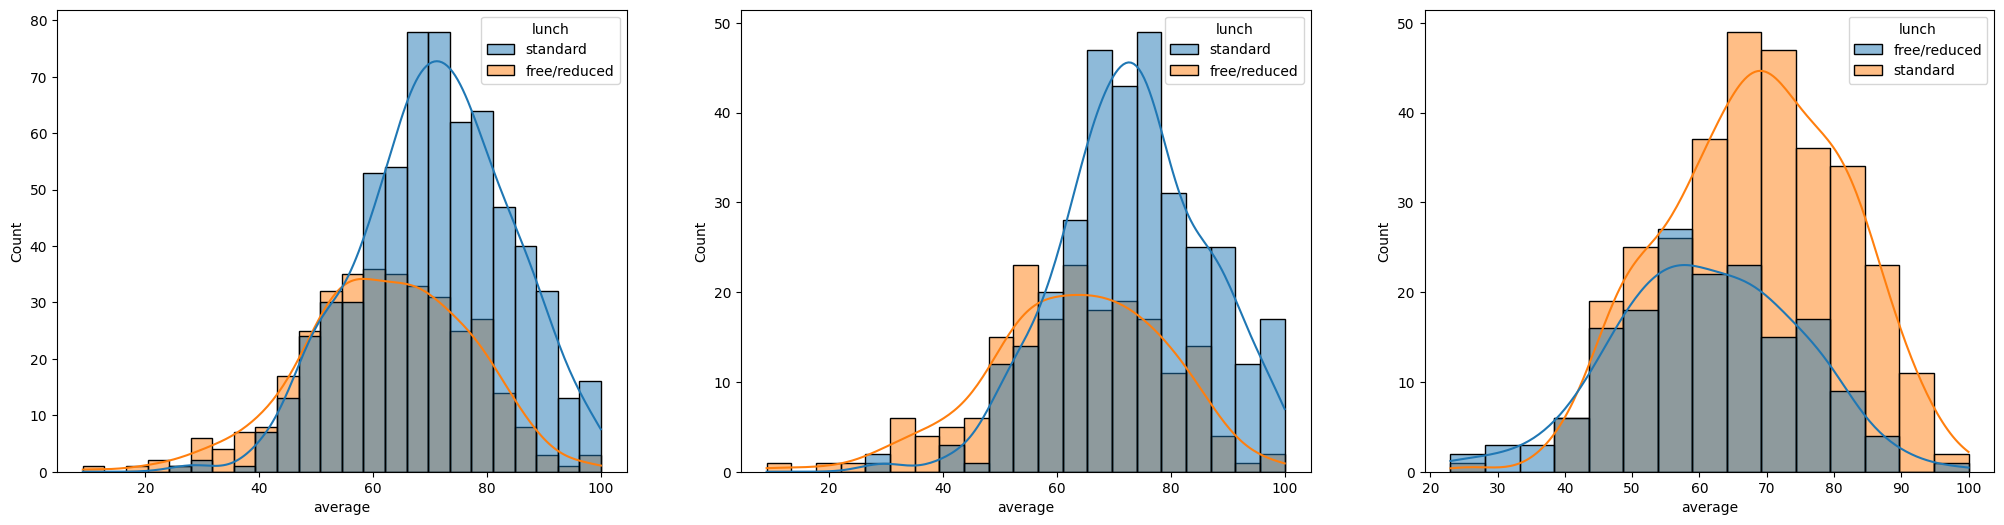

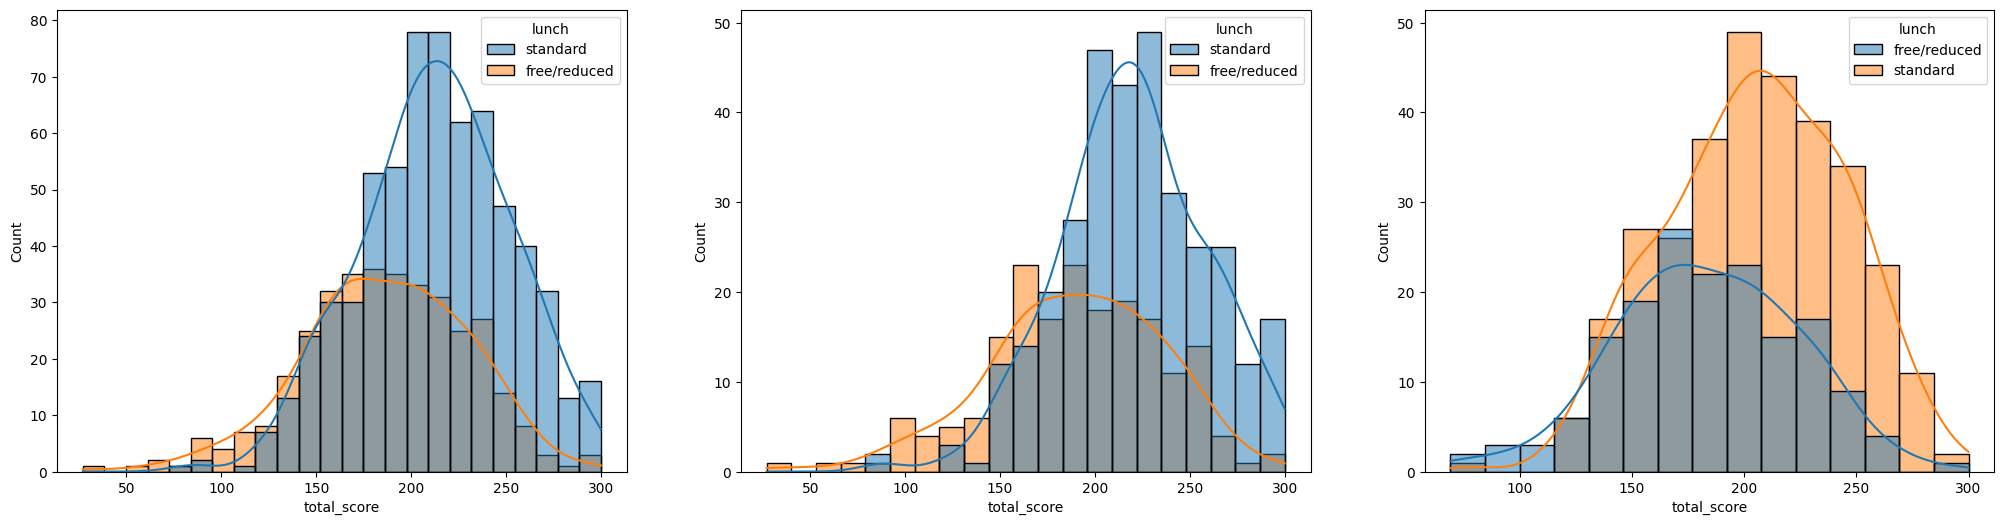

In [15]:
# Plotting histograms for 'average' and 'total_score' based on 'lunch' and 'gender'
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch')

plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131)
sns.histplot(data=df, x='total_score', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='total_score', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='total_score', kde=True, hue='lunch')
plt.show()



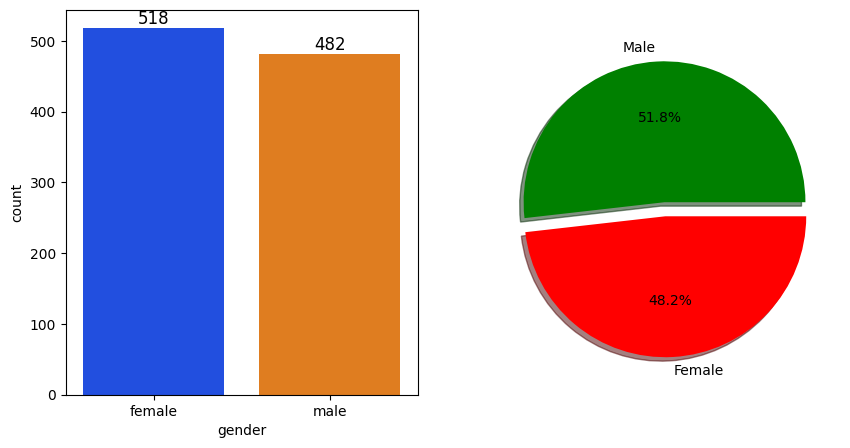

In [58]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))

# Countplot for gender distribution
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0])

# Adding percentage labels to the bars
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)

# Pie chart for gender distribution
plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['green', 'red'])
plt.show()


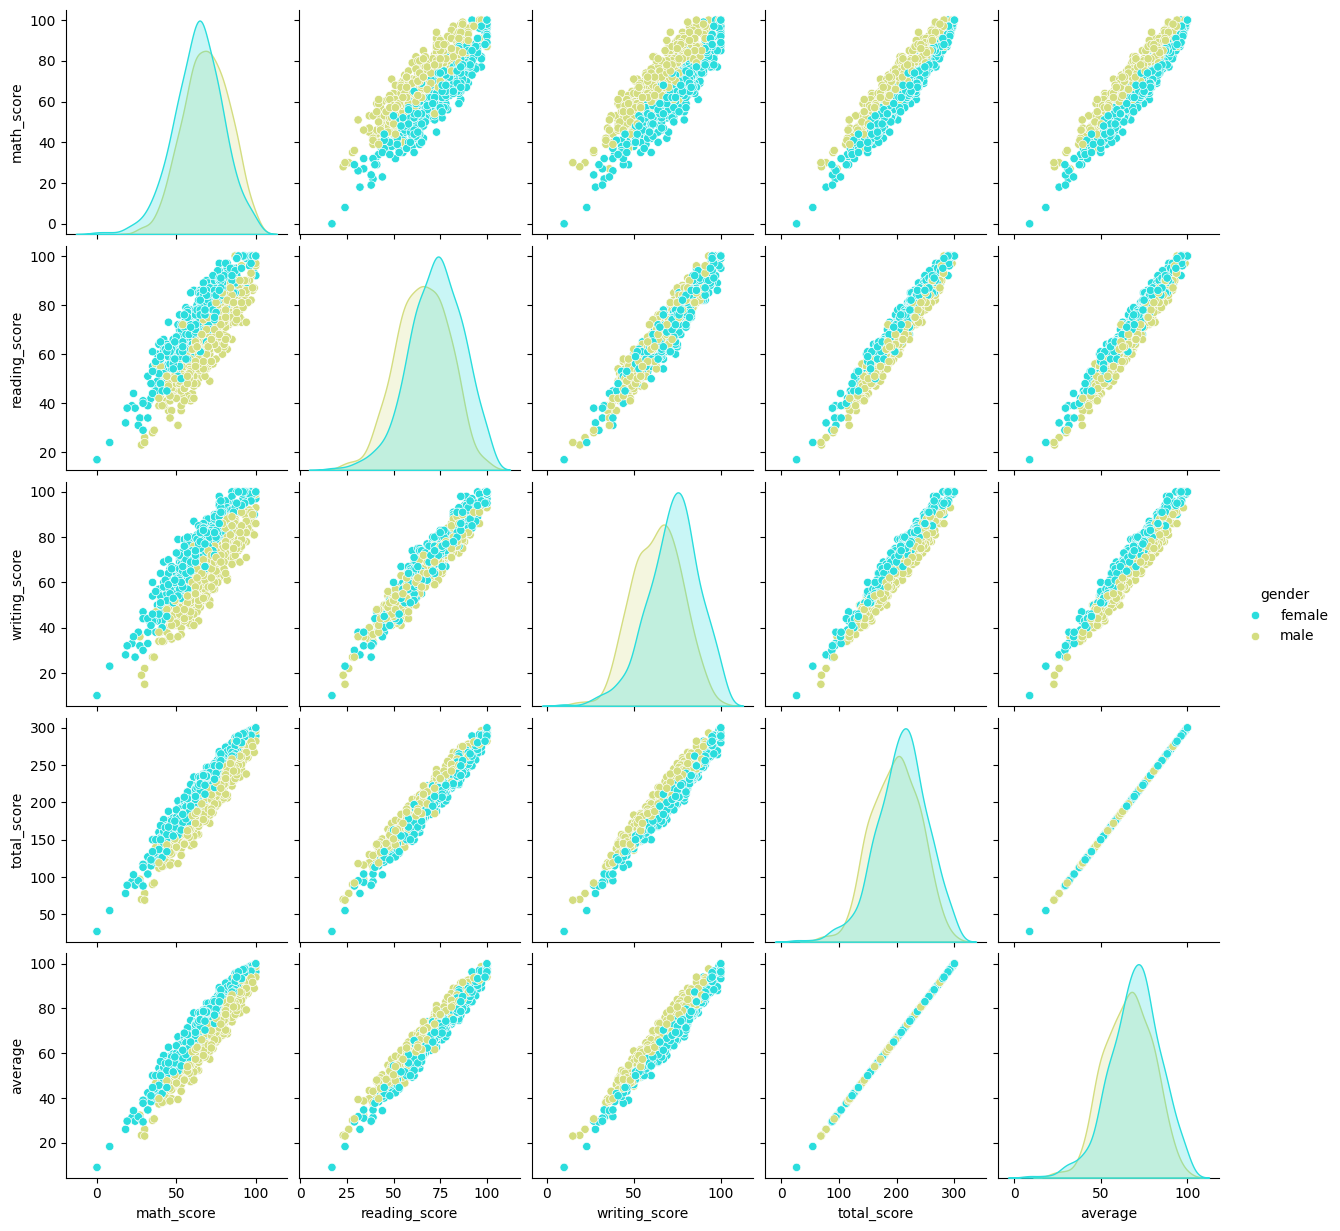

In [18]:
# Pairplot to visualize relationships between numerical features, with hue by gender

sns.pairplot(df,hue = 'gender',palette = 'rainbow')
plt.show()


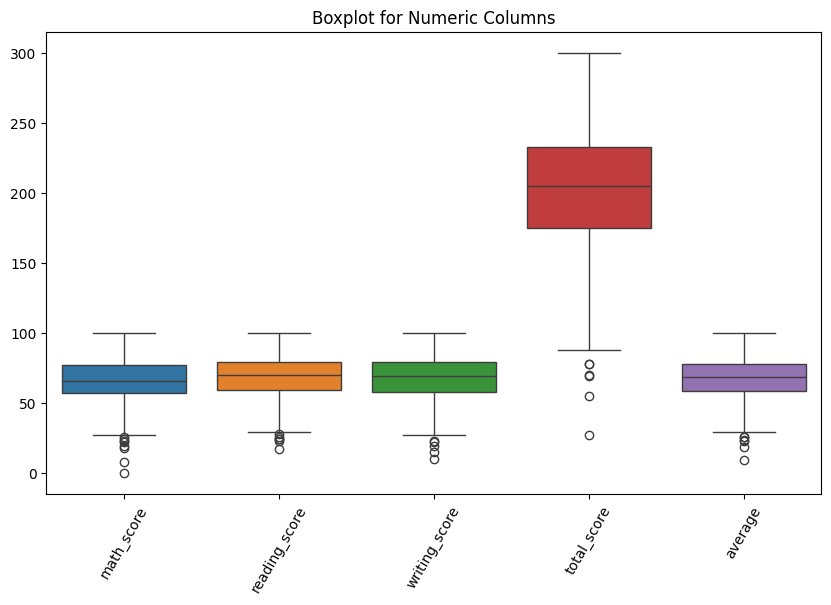

In [59]:
# Boxplot to visualize the distribution of numerical columns including outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_columns)
plt.title('Boxplot for Numeric Columns')
plt.xticks(rotation=60)  
plt.show()

In [60]:
import scipy.stats as stats 

def identify_features(data_frame = None):
    f_outliers = []

    for feature in numeric_columns:
        zscores = np.where(stats.zscore(a = data_frame[feature] , nan_policy="omit").abs()>=3,1,0)

        if 1 in zscores:
            f_outliers.append(feature)
    else:
        pass

    return f_outliers

In [61]:
features = identify_features(data_frame=df)
features


['math_score', 'reading_score', 'writing_score', 'total_score', 'average']

In [62]:
def apply_iqr(data_frame = None):
            for feature in features:
                    Q3=data_frame[feature].quantile(q=0.75)
                    Q1=data_frame[feature].quantile(q=0.25)
                    IQR = Q3-Q1
                    outlier_range = IQR*1.5
                    upperlimit = Q3 + outlier_range
                    lowerlimit = Q1-outlier_range   
                    data_frame[feature] = np.where(data_frame[feature]>=upperlimit , upperlimit , data_frame[feature])
                    data_frame[feature] = np.where(data_frame[feature]<=lowerlimit , lowerlimit , data_frame[feature])

            return data_frame

In [63]:

df = apply_iqr(data_frame=df)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,72.0,72.0,74.0,218.0,72.666667
1,female,group C,some college,standard,69.0,90.0,88.0,247.0,82.333333
2,female,group B,master's degree,standard,90.0,95.0,93.0,278.0,92.666667
3,male,group A,associate's degree,free/reduced,47.0,57.0,44.0,148.0,49.333333
4,male,group C,some college,standard,76.0,78.0,75.0,229.0,76.333333


In [64]:
numeric_columns = df.select_dtypes(include=['number','float'])

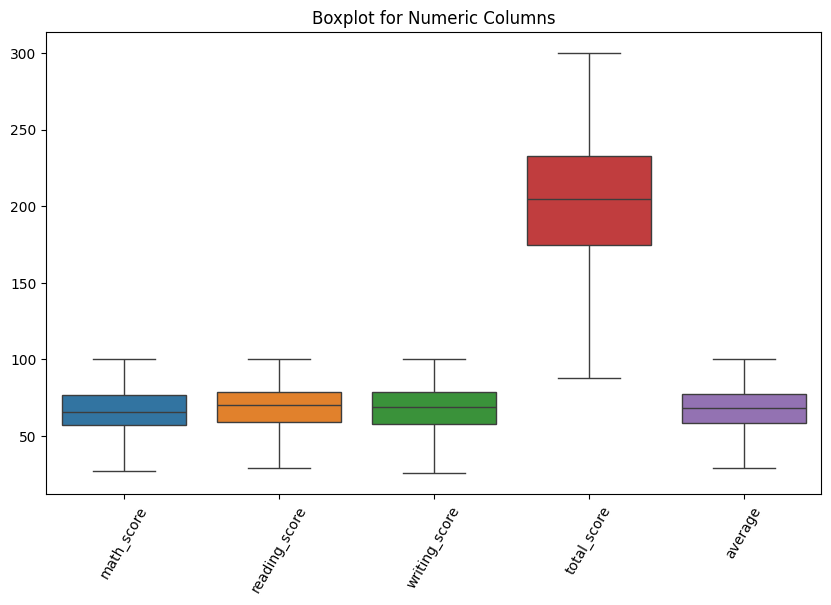

In [65]:


plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_columns)
plt.title('Boxplot for Numeric Columns')
plt.xticks(rotation=60)  
plt.show()


In [66]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression , LinearRegression

from sklearn.model_selection import cross_val_score, train_test_split, RepeatedStratifiedKFold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import Pipeline, make_pipeline




In [67]:
# Select the target variable 'math_score' from the DataFrame

y = df['math_score']
y

0      72.0
1      69.0
2      90.0
3      47.0
4      76.0
       ... 
995    88.0
996    62.0
997    59.0
998    68.0
999    77.0
Name: math_score, Length: 1000, dtype: float64

In [68]:
X = df.drop(columns=['math_score'],axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,72.0,74.0,218.0,72.666667
1,female,group C,some college,standard,90.0,88.0,247.0,82.333333
2,female,group B,master's degree,standard,95.0,93.0,278.0,92.666667
3,male,group A,associate's degree,free/reduced,57.0,44.0,148.0,49.333333
4,male,group C,some college,standard,78.0,75.0,229.0,76.333333


In [69]:
# Select numeric and categorical features

numeric_features = X.select_dtypes(exclude="object").columns
categoric_features = X.select_dtypes(include="object").columns

# Define transformers for numeric and categorical features

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

# Define a preprocessor using ColumnTransformer to apply transformations to different types of features

preprocessor = ColumnTransformer(
    [    ("OneHotEncoder", oh_transformer, categoric_features),
         ("StandardScaler", numeric_transformer, numeric_features),])

In [70]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch'], dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['reading_score', 'writing_score', 'total_score', 'average'], dtype='object'))])

In [71]:

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 8), (200, 8))

In [72]:
# Apply the preprocessor to transform the training and testing sets
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [74]:
# Create and train the linear regression model

linear_model = LinearRegression(n_jobs=-1 , fit_intercept=True)
linear_model = linear_model.fit(X_train, y_train)


In [75]:
# Predicting with the test data and evaluating the accuracy of the model by calculating the R^2 score

y_pred = linear_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 99.70


In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# RMSE 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# MAE 
mae = mean_absolute_error(y_test, y_pred)

# MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)


RMSE: 0.8266706522113594
MAE: 0.14788330078125
MAPE: 0.46437120367544205


In [77]:
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedStratifiedKFold


In [78]:
cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)

cv_mean_score = np.mean(cv_scores)
print("Mean cross-validation score:", cv_mean_score)


Cross-validation scores: [0.99971927 0.9989813  0.99993497 0.99950842 0.99884507]
Mean cross-validation score: 0.9993978071892233


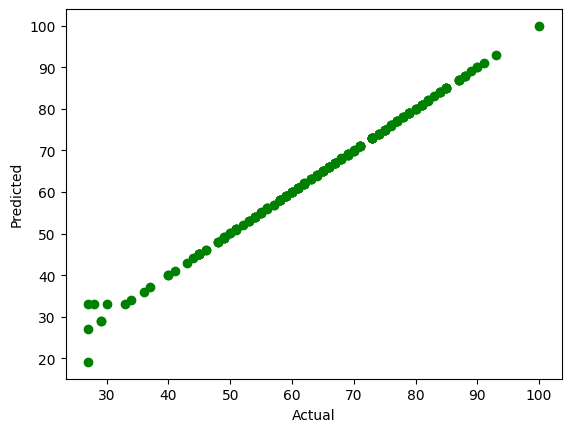

In [79]:
# Visualizing the predicted values against the actual values using a scatter plot

plt.scatter(y_test,y_pred  ,color = 'green');
plt.xlabel('Actual');
plt.ylabel('Predicted');

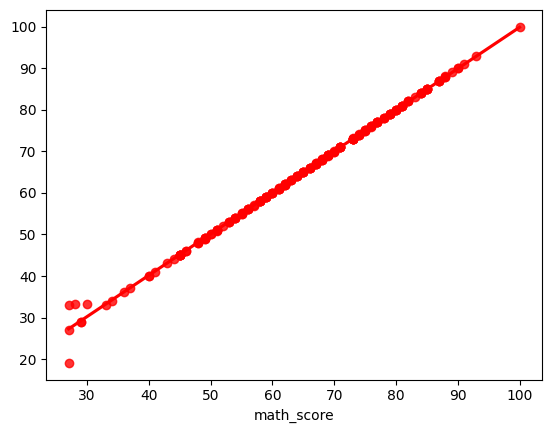

In [80]:
# Visualizing the predicted values against the actual values using a regression plot

sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [81]:
# Creating a DataFrame to store actual, predicted, and difference values

prediction_df=pd.DataFrame({'Actual_Value':y_test,'Predicted_Value':y_pred,'Difference':y_test-y_pred} )
prediction_df

,Actual_Value,Predicted_Value,Difference
521,91.0,90.946289,0.053711
737,53.0,53.028320,-0.028320
740,80.0,79.966309,0.033691
660,74.0,74.054688,-0.054688
411,84.0,84.044434,-0.044434
...,...,...,...
408,52.0,51.956055,0.043945
332,62.0,62.006348,-0.006348
208,74.0,74.001465,-0.001465
613,65.0,65.052246,-0.052246
